Normally, we take a vector to be an oriented distance, but in PGA we change it up a bit and take a vector of the form
  $a e_1 + b e_2 + c e_3 - d e_0$
to represent a plane
  $ax + by + cz - d = 0$

In [1]:
from pga.in3d import *

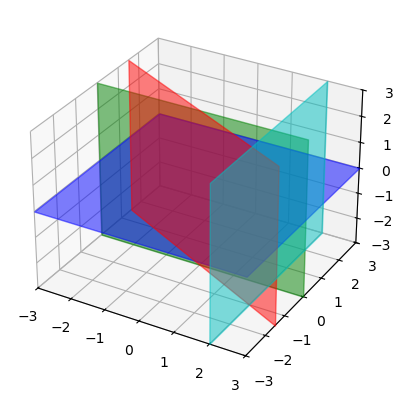

In [15]:
draw(e3)
draw(e2)
draw(e1 + 2*e2)
draw(e1 - 2*e0)
show()

as you might notice, the coordinates are homogeneous — scaling a vector doesn't change what geometrical element it represents.

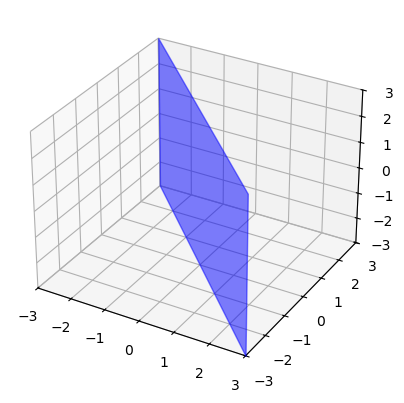

In [13]:
α = 2 # <- change this
draw(α*(e1 + e2))
show()

You can intersect them with the `^` operator.

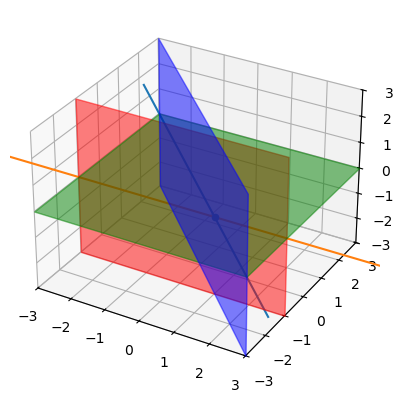

In [30]:
p = e1 + e2
q = e3
r = e2 + e0
draw(p)
draw(q)
draw(r)
draw(p ^ q)
draw(q ^ r)
draw(p ^ q ^ r)
show()

If you try to `^` an element with itself, you get 0.

In [26]:
p^p

0


the `^` operator is defined as associative distributive (over addition) operator that satisfies:
$$e_n \wedge e_n = 0$$
$$e_n \wedge e_m = - e_m \wedge e_n$$

In [31]:
print(f'({p}) ^ ({q}) == {p^q}')
print(f'({p^q}) ^ ({r}) == {p^q^r}')

(1.0e1 + 1.0e2) ^ (1.0e3) == 1.0e13 + 1.0e23
(1.0e13 + 1.0e23) ^ (1.0e0 + 1.0e2) == 1.0e013 + 1.0e023 + -1.0e123


Where `e12` is just a shorthand for $e_1 \wedge e_2$

How does PGA represent the point $(x, y, z) = (a, b, c)$?
\begin{align}
&(e_1 - a e_0) \wedge (e_2 - b e_0) \wedge (e_3 - c e_0)
 \\ =& \ 
  e_{123} - a e_{023} - b e_{103} - c e_{120}
\end{align}
and of course, as with planes, any scalar multiple gives you the same point

In [33]:
(e1 - 2*e0)^(e2 - 3*e0)^(e3 - 4*e0)

-4.0e012 + 3.0e013 + -2.0e023 + 1.0e123

Notice that
\begin{align}
  + e_0 \wedge e_{123} = e_{0123} \\
  - e_1 \wedge e_{023} = e_{0123} \\
  - e_2 \wedge e_{103} = e_{0123} \\
  - e_3 \wedge e_{120} = e_{0123}
\end{align}
This suggests that there is some sort of duality between
$e_{123} - a e_{023} - b e_{103} - c e_{120}$
and
$- e_0 + a e_1   + b e_2   + c e_3$
this duality is exposed through the `dual()` operator:

In [34]:
p = e1 + 2*e2 - 3*e0
p.dual()

2.0e013 + -1.0e023 + -3.0e123


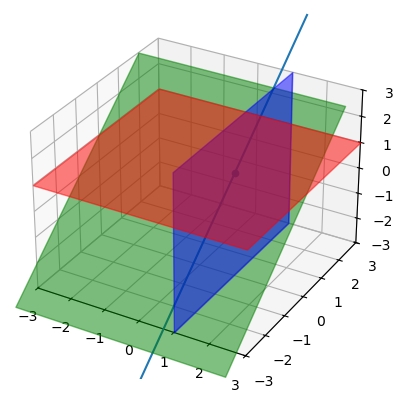

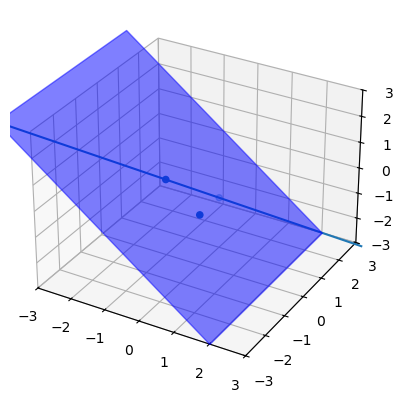

In [6]:
p = e1 - e0
q = - e2 + e3 - e0
r = e3 - e0
scene = [p, q, r, p^q, p^q^r]
for A in scene:
    draw(A)
show()
for A in scene:
    draw(A.dual())
show()

As you can see, the dual of a plane is a point, 
the dual of a line is a line, and the dual of a point is a plane.
The dualized the `^` operator joins 2 points into a line and 3 points (or a line and a point) into a plane.

We can bring this ability into non-dualized world like this:
$$A \& B = (A.\mathit{undual}() \wedge B.\mathit{undual}()).\mathit{dual}()$$
where `undal()` is the inverse of `dual()`.  
(In the literature the operator `&` is written $A \lor B$)

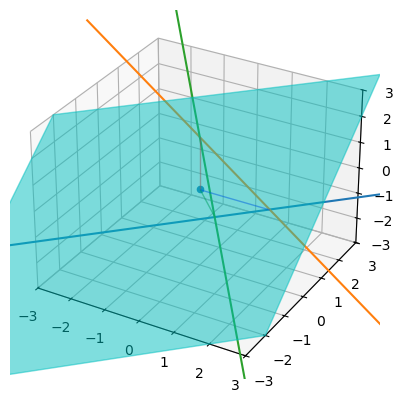

In [21]:
A = (2*e1 + e0).dual()
B = (-1*e2 + e1 + e0).dual()
C = (2*e3 + e0).dual()
draw(O)
draw([O, A])
draw([O, B])
draw([O, C])
draw(A & B)
draw(A & C)
draw(B & C)
draw(A & B & C)

show()

What happens if we intersect two parallel planes?

In [10]:
p = e1 - 2*e0
q = e1
p ^ q

-2.0e01

We get an ideal line: a line that is infinitely far away.

You can join it with a point to create another plane parallel to the first two:

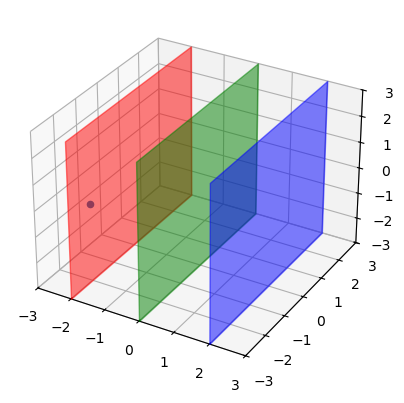

In [15]:
draw(p)
draw(q)
P = (2*e1 + 2*e2 - e0).dual()
draw(P)
draw((p ^ q) & P)
show()

3D Projective Geometric Algebra supports ideal points, lines, and one ideal plane that contains all of them.

In computer graphics, these ideal elements eliminate a lot of special cases that would otherwise be needed to properly handle parallel objects.


At this point I should probably get around to introducing the most important product of the algebra: the geometric product.

The geometric product is a associative product that distributes over addition and satisfies these laws:
\begin{align}
  e_0 e_0 &= 0 \\
  e_n e_n &= 1 \text{\ if\ } n \ne 0 \\
  e_n e_m &= - e_m e_n = e_n \wedge e_m \text{\ if\ } n \ne m
\end{align}
where $n, m \in \mathbb{R}$

The first interesting observation you might have is that all vectors (planes), except for the ideal one, square to a scalar:

In [4]:
p = e1 + e2 - e0
q = e2 + 2*e3 - 2*e0
r = 4*e1 - e2 - 4*e0
print(p*p, q*q, r*r, e0*e0)

2.0 5.0 17.0 0


The second is that you can use this to construct an inverse.

In [6]:
p_inv = p * (1/(p*p))
p * p_inv

1.0

We can now define division by a vector as

$$ \frac{A}{p} = A p \frac{1}{p p} $$

In [11]:
e0*p/p

1.0e0

The geometric product agrees with `^` if the vectors are orthogonal.

Sandwiching something between two vectors (planes) reflects it around that plane:

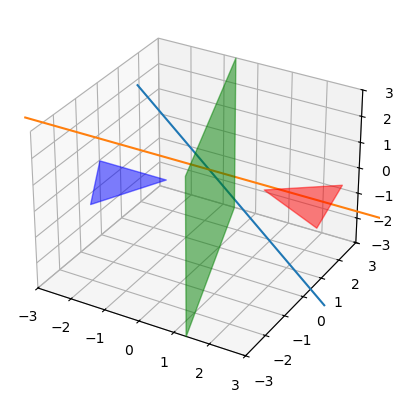

In [10]:
A = (e1 - e0).dual()
B = (3*e1 - e0).dual()
C = (2*e1 + 2*e2 - e0).dual()
tri = [A, B, C]
p = 3*e1 + e2 - e0
draw(tri)
draw(p)
draw([-p * X / p for X in tri])
show()

A composition of two reflections is either a rotation (by twice the angle between the planes) or if the reflection planes were parallel then translation (by twice the distance between the planes).

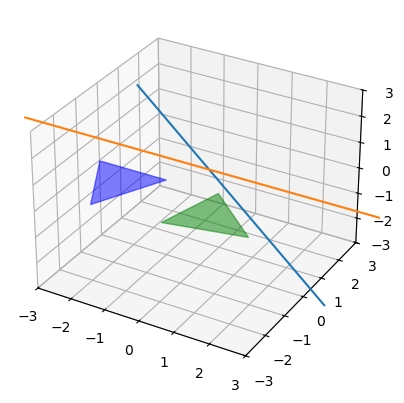

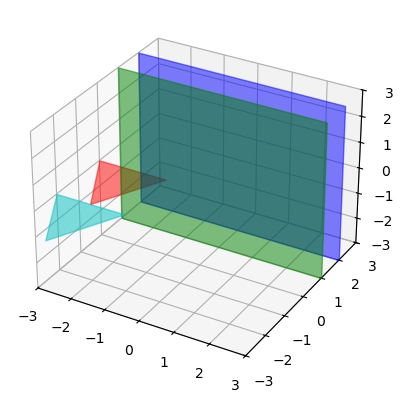

In [11]:
p = e2 - e0
q = 1.3*e2 + e1 - e0
r = e2 - 2*e0

# not showing the whole planes for clarity
draw(q ^ e3)
draw(p ^ e3)
draw(tri)
draw([p * q * X / q / p for X in tri])
show()

draw(r)
draw(p)
draw(tri)
draw([p * r * X / r / p for X in tri])
show()

A geometric product of vectors is called a versor.
You can divide by a versor by reversing the order of the products:

In [12]:
V = p * q
V_rev = q * p
V_inv = V_rev * (1/(V * V_rev))
print(V * V_inv)

1.0


Notice that `V * V_rev` is always a scalar.

This way the formula for applying versors just becomes $V X / V$.

(To preserve orientation you have to add a minus sign in some cases, the details are little more involved, partly because there's more than one way to define the orientation of a plane)

Can a reverse of a versor be computed without knowing it's factors? Yes, it can because reverse distributes over addition:
\begin{align}
& ((p_1 + p_2) q).\mathit{reverse}() \\
=\ & (q p_1).\mathit{reverse}() + (q p_2).\mathit{reverse}() \\
=\ & q p_1 + q p_2 \\
=\ & q (p_1 + p_2)
\end{align}
Thus you only need to reverse the basis of a versor:

In [17]:
V = (e1 + e2) * (e2 + e3)
print(V) # prints 1 + e12 + e13 + e23
V_rev1 = (e2 + e3) * (e1 + e2)
V_rev2 = 1 + e2*e1 + e3*e1 + e3*e2
assert V_rev1 == V_rev2 == V.reverse()


1.0 + 1.0e12 + 1.0e13 + 1.0e23


A very useful property is that a `^` of vectors is a versor (the proof just boils down to orthogonalizing the vectors)

Using a `V * X / V` where V is a point gives you a point reflection. If V is a line it gives you line reflection.

This lets you easily prove that the reflection formula can act on any versor X:
```
  V * X / V
= V * x1 * x2 * … * xN / V
= V * x1 / V * V * x2 / V * V * … / V * V * xN / V
```
So rotating a versor just rotates it's constituent vecors.

As you may know, any euclidian motion can be expressed as a buch of reflections so any euclidian motion can be expressed as a versor sandwich.

By now I should probably mention something about versors...
Is $e_{12} + e_{03}$ a versor? No

In [21]:
(e2*e1 + e3*e0) * (e1*e2 + e0*e3)

1.0 + -2.0e0123

In general a sum of versors does not need to be another versor.

Only addition of ve*ctors* has a nice geometric meaning.

Adding two planes gives you another plane that passes through the line in which the two planes intersect.

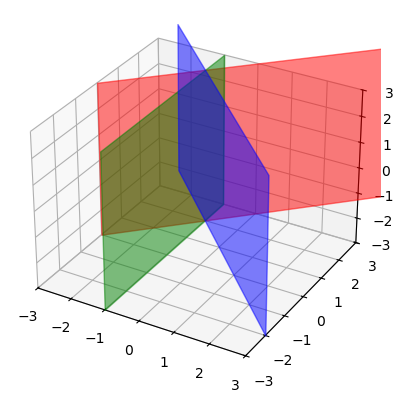

In [23]:
p = e1 + e2 - e0
q = - 2*e1 - 2*e0
draw(p)
draw(q)
draw(p + q)
show()

Thus the planes passing through a line form a vector space.

Similarly, adding 3 planes gives you another plane that passes through the point where the three planes intersect

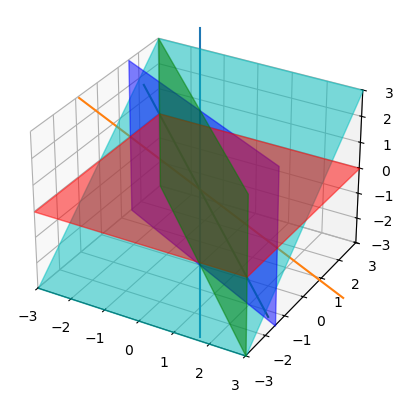

In [32]:
p = -e1 - 2*e2
q = e1 + e2
r = e3
draw(p)
draw(q)
draw(r)
draw(p ^ q)
draw(p ^ r)
draw(r ^ q)
draw(p + q + r)
show()

So planes passing though a given point also form a vector space.

This suggests that we can think about lines/points as subspaces.

There's one more important product that I haven't told you about yet: the contraction product `A | B` (normally denoted as $A \cdot B$).

When applied to two normalized vectors, it gives you the cosine of the angle between the planes:

True

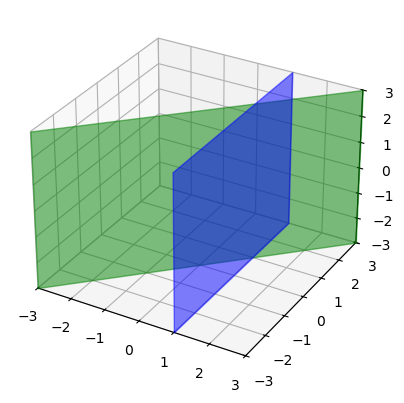

In [44]:
p = (e1 - e0).normalize()
q = (e1 - e2).normalize()
draw(p)
draw(q)
show()
import math
(p | q).almost_eq(1/math.sqrt(2))

In general, `A | B` returns the subspace of B that is orthogonal to A

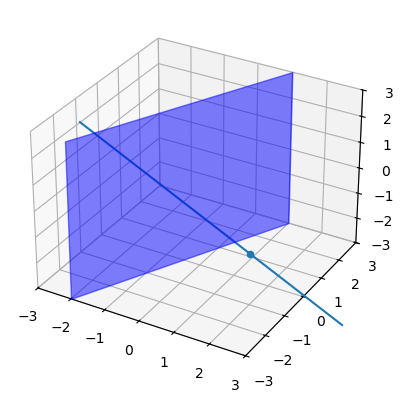

In [57]:
P = (-2*e1 + e2 + e3 - e0).dual()
p = 2*e1 - e2 + e0
draw(p)
draw(P)
draw(p | P)
show()

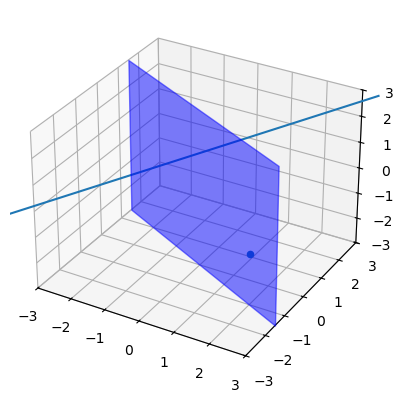

In [62]:
L = p ^ (e3 - e0)
draw(L)
draw(P)
draw(L | P)
show()

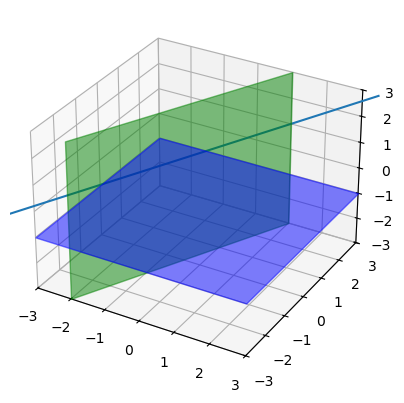

In [66]:
q = e3 + e0
draw(L)
draw(q)
draw(q | L)
show()

`|` is linear but not associative

You can use `|` to transport/project geometric elements to different locations

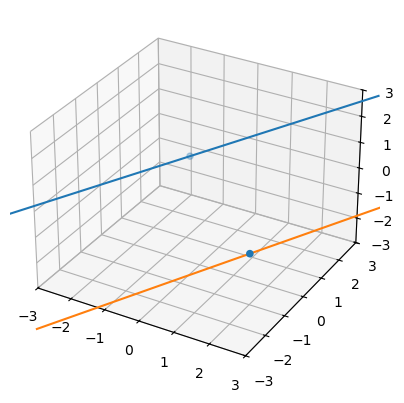

In [70]:
draw(L)
draw(P)
draw(P.inv()*(L | P))
draw((L | P) / L)
show()

PGA also supports exponentials and logarithms

To get a rotation around an axis you can take the exponential of that axis:

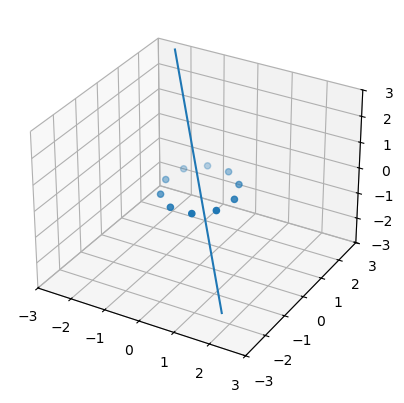

In [14]:
P = (e1 - e0).dual()
q = (e1^(e2 + .2*e3)).normalize()
draw(P)
draw(q)
n = 10
import math
for i in range(1, n):
  half_angle = i*math.pi/n
  R = exp(half_angle*q)
  draw(R*P/R)
show()

When the rotation axis is ideal, you get a translation:

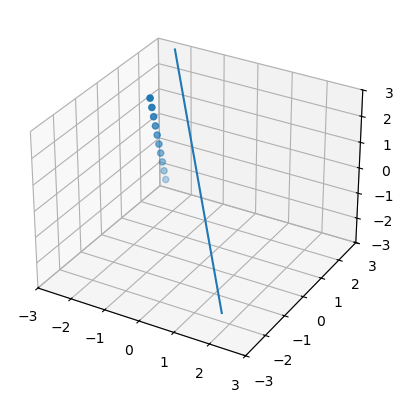

In [17]:
draw(P)
draw(q)
# I = e01234
# this gets the ideal line orthogonal to q
r = q * I
n = 10
for i in range(1, n):
  half_distance = i*2/n
  T = exp(half_distance*r)
  draw(T*P/T)
show()

PGA also supports logarithm so you can interpolate motions:

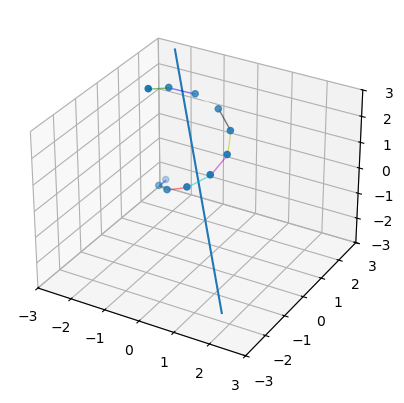

In [34]:
half_angle = math.pi
half_dist = 2
M = exp(half_angle*q)*exp(half_dist*r)
steps = 10
M_step = exp(log(M)/steps)

draw(P)
draw(q)

old_X = P
for _ in range(0, steps):
    X = M_step * old_X / M_step
    draw([old_X, X])
    draw(X)
    old_X = X
show()

And that's the end of the tutorial

In this tutorial I avoided introducing terminology, but you should probably know at least these terms:
- n-blade: $v_1 \wedge … \wedge v_n$ where $v_1, …, v_n$ are vectors ($n$ is called the grade)
- n-vector: an arbitrary sum of n-blades (2-vector = bivector, 3-vector = trivector)
- multivector: an arbitrary sum of arbitrary blades
- versor: $v_1 … v_n$ for some n where $v_1, …, v_n$ are vectors
- pseudoscalar: all the basis vectors multiplied together, denoted as $I$

If you want to read the literature, here are some notes:
- most equations don't apply to general multivectors, more often then not they are restricted to vectors, blades, or versors
- different authors use different generalizations of the dot product (a common used definition defines $A \cdot B$ as the lowest grade part of $A B$ where $A$ and $B$ are blades, the rest is extended lineraly)

Sources:

Leo Dorst & Steven De Keninck  
A Guided Tour to the Plane-Based Geometric Algebra PGA  
2022, version 2.0  
Available at http://www.geometricalgebra.net  
and http://bivector.net/PGA4CS.html.


Course notes Geometric Algebra for Computer Graphics  
SIGGRAPH 2019  
Charles G. Gunn, Ph. D.


Geometric Algebra for Computer Science  
An Object Oriented Approach to Geometry  
Leo Dorst, Daniel Fontijne, Stephen Mann
